In [1]:
import os
import argparse
import matplotlib.pyplot as plt
import numpy as np
import json
from helpers import data_loaders as dls
from helpers.viz import plot, plot_history
from helpers.logger import Logger
import utils
import dl_models
import keras #this is required
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras import backend as k
from keras_custom_loss import weightedLoss2
#cyclic lr
import keras_contrib
from helpers.sgdr import SGDRScheduler
from helpers.lr_finder import LRFinder, get_lr_for_model

Using TensorFlow backend.


In [10]:
KPC = utils.KittiPointCloudClass(dataset_path='../', 
                                     add_geometrical_features=False,
                                     subsample=False,
                                     compute_HOG=False,
                                     eigen_neighbors=100,
                                     view='bev',
                                     subsample_ratio='',
                                     dataset='kitti',
                                     sequences='')

In [3]:
pc = np.fromfile('../dataset/KITTI/dataset/data_road_velodyne/training/velodyne/um_000000.bin', dtype=np.float32).reshape(-1, 4)

In [4]:
KPC.z_min, KPC.z_max = -2.0, 6


In [13]:
KPC.COUNT_MAX = 100
#pc = utils.subsample_pc(pc, sub_ratio=2)

In [14]:
%%timeit
f = KPC.get_features([pc, None, None])

163 ms ± 1.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
f.shape

(64, 943, 12)

In [8]:
np.unique(f[:, :, 8])

array([0.        , 0.00292472, 0.00357279, ..., 0.91529775, 0.93674821,
       0.94095796])

In [9]:
import matplotlib.pyplot as plt


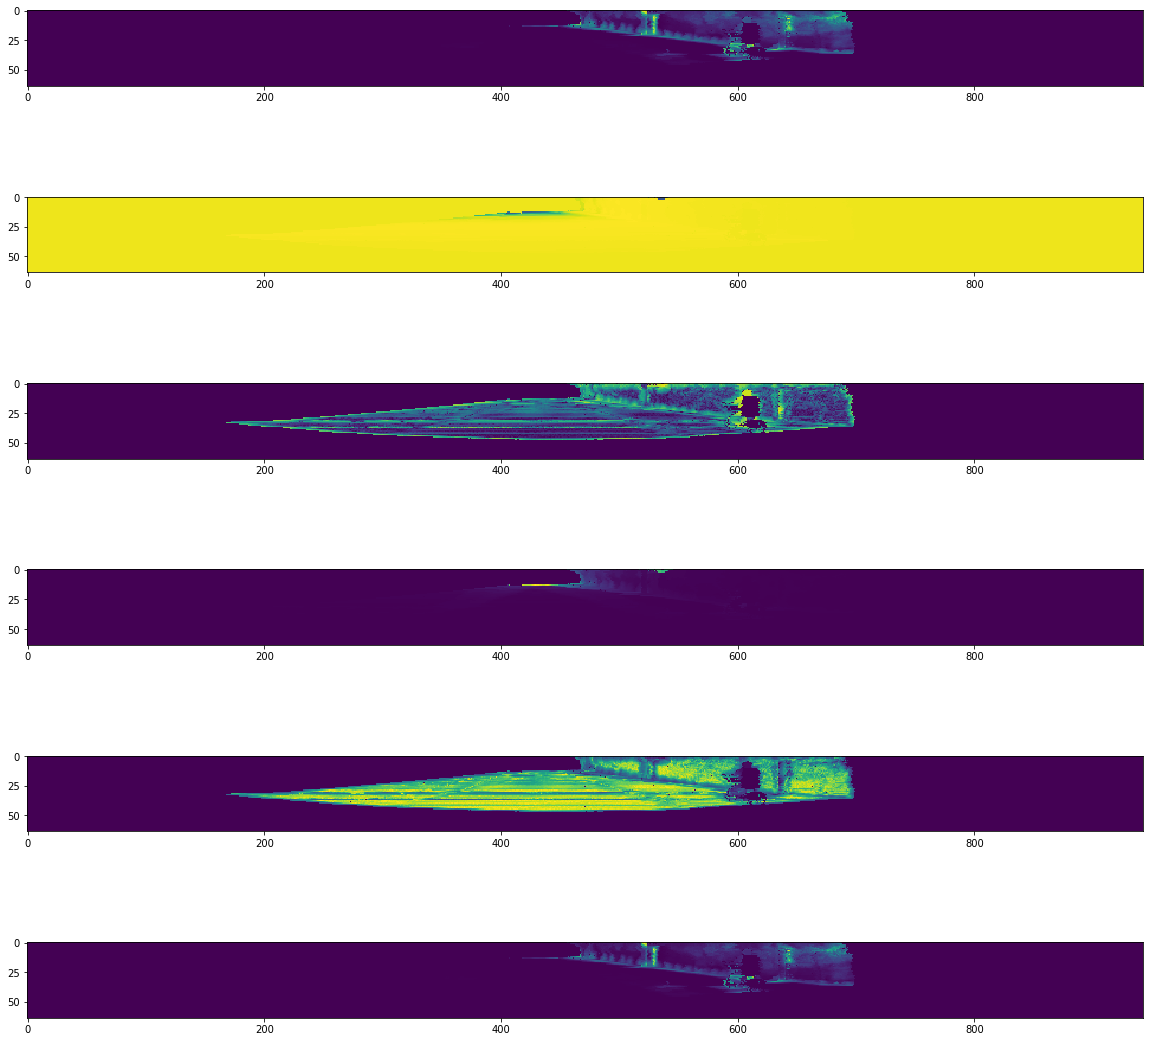

In [18]:
fig, axes = plt.subplots(nrows=6,ncols=1, figsize=(20,20))
for i in range(6, 12):
    axes[i-6].imshow(f[:,:,i])
    